In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/HitBuy Atrium/Downloads/NSE-TATAGLOBAL11.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


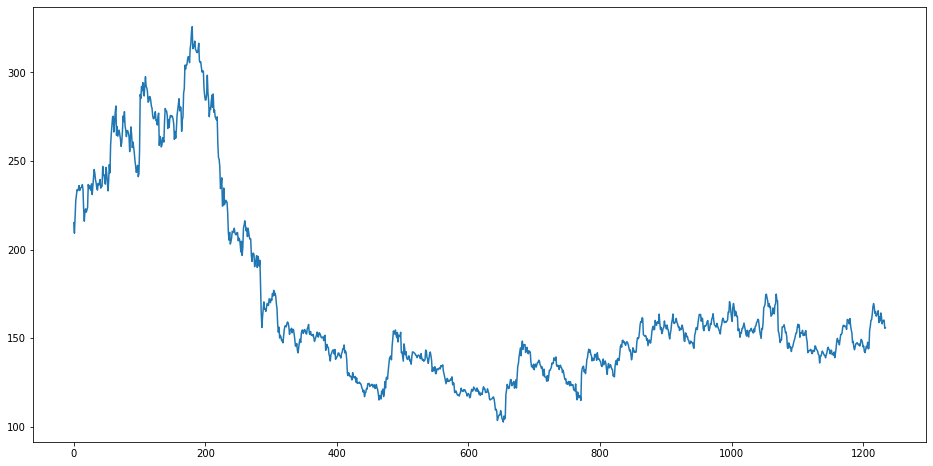

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [5]:
#import quandl - library linked to website quandl, for easy import of company historical stock price. 
#widely used, though, not used here as I used data set from my computer.


In [6]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [7]:
z = df[['High','Total Trade Quantity','Turnover (Lacs)']]
y = df['Close']

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lm.score(z,y)

0.9983889063406552

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.20, random_state=1)

In [12]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lm.predict(x_test)

array([262.30400775, 130.88921385, 158.52765747, 133.09094266,
       120.31124605, 119.09383731, 213.3542969 , 272.29883145,
       105.58062291, 155.34476599, 140.70306733, 302.47778808,
       164.69686596, 163.7182119 , 271.09089347, 126.6913564 ,
       298.29434246, 157.04671111, 142.72536355, 128.27611327,
       147.55157453, 127.70302801, 147.61249143, 159.72576268,
       169.60654169, 152.61007796, 159.12953949, 158.69502737,
       287.20413639, 143.88211915, 153.66014172, 143.27499232,
       149.32001233, 141.01527039, 134.31976807, 152.18335182,
       140.03511589, 208.89872366, 154.140868  , 175.95661229,
       134.09682774, 268.61079574, 284.48059231, 124.35641305,
       202.576647  , 205.32895403, 164.80285464, 156.80885329,
       114.72576056, 272.67540773, 175.70778839, 154.76669753,
       139.24603455, 150.13040709, 154.47935582, 146.91355467,
       159.13129373, 117.83383671, 133.88841711, 295.40768748,
       148.28052949, 151.72130856, 160.71486297, 141.40

In [14]:
print("number of test samples :", x_test.shape[0])
yhat = lm.predict(x_test)
print("True value: ",y_test[0:4].values)
print("Predicted value: ",yhat[0:4])

number of test samples : 247
True value:  [263.2  131.5  160.35 134.  ]
Predicted value:  [262.30400775 130.88921385 158.52765747 133.09094266]


In [15]:
#R^2 calculation
lm.score(x_test,y_test)

0.9984832506339634

In [16]:
table = df[['Close']]

In [17]:
print(table.head())

    Close
0  215.15
1  209.20
2  218.20
3  227.60
4  230.90


In [18]:
table['Prediction'] = table.shift(30,axis = 0)

C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
table.head(30)

,Close,Prediction
0,215.15,NaN
1,209.20,NaN
2,218.20,NaN
3,227.60,NaN
4,230.90,NaN
5,233.75,NaN
6,233.25,NaN
7,234.25,NaN
8,236.10,NaN
9,233.30,NaN


In [39]:
x = table.drop(columns = 'Prediction')

In [40]:
x = x.iloc[30:,]
print(x)

       Close
30    240.55
31    245.15
32    243.00
33    239.35
34    237.55
35    234.55
36    233.55
37    237.30
38    236.35
39    237.60
40    239.50
41    234.65
42    235.45
43    235.65
44    246.90
45    242.20
46    242.25
47    239.10
48    236.90
49    246.30
50    243.30
51    238.60
52    233.10
53    238.65
54    247.90
55    243.25
56    258.90
57    265.20
58    269.80
59    274.75
...      ...
1205  145.35
1206  144.55
1207  147.70
1208  143.95
1209  144.30
1210  154.55
1211  156.55
1212  160.10
1213  160.35
1214  163.55
1215  167.60
1216  169.50
1217  167.70
1218  164.00
1219  165.00
1220  162.40
1221  163.25
1222  163.85
1223  165.45
1224  158.75
1225  161.85
1226  159.60
1227  164.20
1228  162.00
1229  158.05
1230  159.45
1231  160.05
1232  160.15
1233  155.55
1234  155.80

[1205 rows x 1 columns]


In [42]:
y = table['Prediction']

In [43]:
y = y.iloc[30:,]
print(y)

30      215.15
31      209.20
32      218.20
33      227.60
34      230.90
35      233.75
36      233.25
37      234.25
38      236.10
39      233.30
40      234.60
41      234.90
42      235.05
43      236.60
44      233.95
45      222.65
46      216.00
47      222.00
48      222.95
49      221.05
50      222.40
51      223.70
52      236.70
53      234.30
54      236.00
55      234.55
56      233.35
57      237.05
58      231.00
59      235.45
         ...  
1205    154.95
1206    160.50
1207    160.45
1208    159.80
1209    158.05
1210    161.05
1211    157.25
1212    154.70
1213    153.10
1214    147.50
1215    148.20
1216    144.75
1217    143.45
1218    145.15
1219    146.75
1220    147.00
1221    147.45
1222    146.70
1223    146.20
1224    146.65
1225    145.55
1226    146.80
1227    149.30
1228    148.90
1229    147.65
1230    145.05
1231    145.50
1232    142.40
1233    141.80
1234    143.65
Name: Prediction, Length: 1205, dtype: float64


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
Rvalue = svr_rbf.score(x_test,y_test)

In [48]:
print(Rvalue)

0.8846147873667018


In [49]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
rLM = lm.score(x_test,y_test)
print(rLM)

0.8665961422244106


In [61]:
x_forecast = table.drop(columns = 'Prediction')
x_forecast = x_forecast.iloc[0:30, :]

In [62]:
print(x_forecast)

     Close
0   215.15
1   209.20
2   218.20
3   227.60
4   230.90
5   233.75
6   233.25
7   234.25
8   236.10
9   233.30
10  234.60
11  234.90
12  235.05
13  236.60
14  233.95
15  222.65
16  216.00
17  222.00
18  222.95
19  221.05
20  222.40
21  223.70
22  236.70
23  234.30
24  236.00
25  234.55
26  233.35
27  237.05
28  231.00
29  235.45


In [64]:
yhat = lm.predict(x_forecast)

In [67]:
print("True value: ", x_forecast[0:7].values)
print("Predict value: ",yhat[0:7])

True value:  [[215.15]
 [209.2 ]
 [218.2 ]
 [227.6 ]
 [230.9 ]
 [233.75]
 [233.25]]
Predict value:  [214.58595889 208.92950049 217.48548798 226.42174158 229.558937
 232.26833304 231.7930004 ]


In [68]:
SVMpred = svr_rbf.predict(x_forecast)

In [69]:
print("SVMpred: ",SVMpred[0:7])

SVMpred:  [228.76682383 286.53555716 242.50092929 292.73703593 257.76448545
 237.20166134 236.62416571]
